<a href="https://colab.research.google.com/github/AlessandraSalanitri/DataScienceProject/blob/main/DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading and first analysis of the dataset**

In [1]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

print("Dataset Preview:")
print(df.head())


Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:

print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0

In [6]:
print("\nInvalid Value Check:")
print((df == 0).sum())


Invalid Value Check:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [7]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

In [8]:
print("\nMissing Values After Replacement:")
print(df.isnull().sum())


Missing Values After Replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [9]:
df.fillna(df.median(), inplace=True)

In [10]:
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Exploratory Data Analysis (EDA)

Visualize Distributions

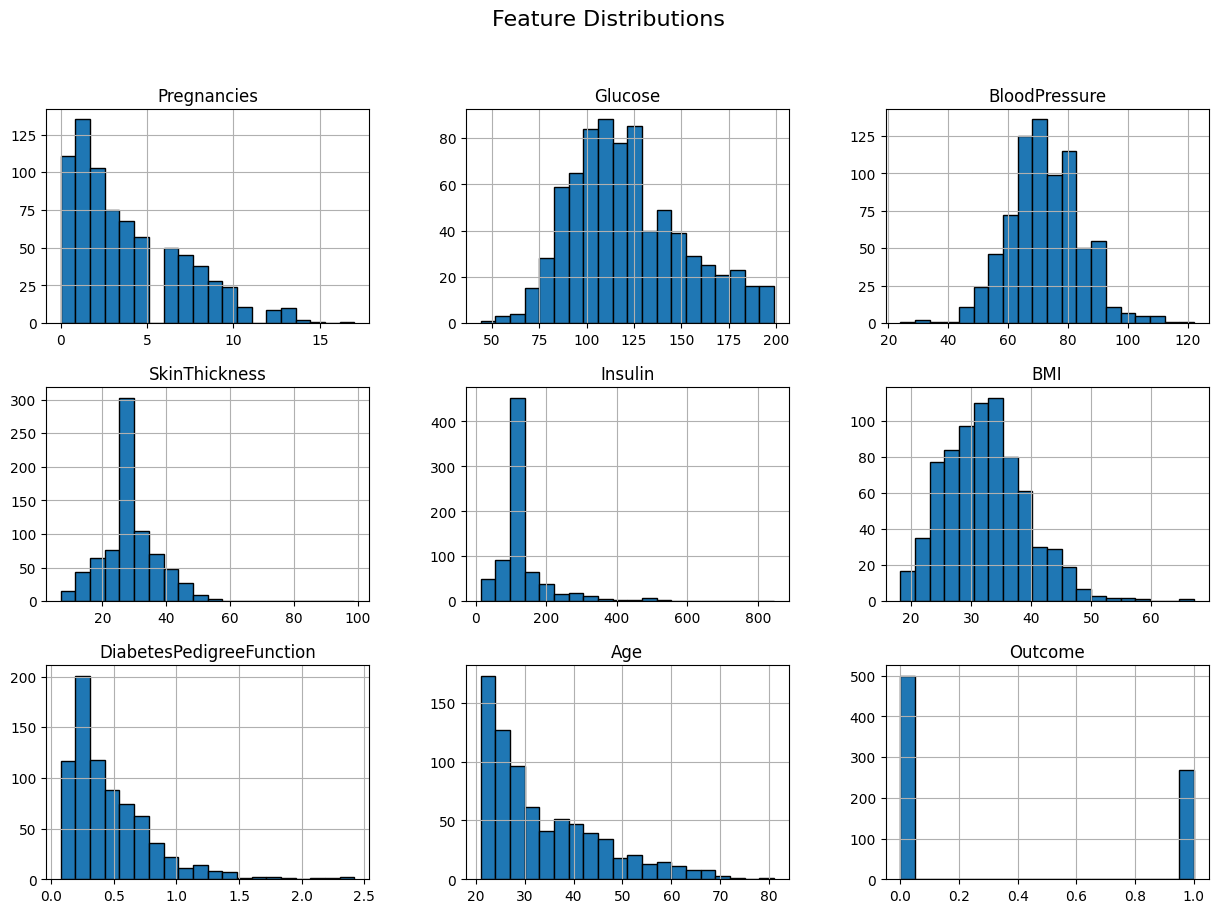

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

Analyze Correlations

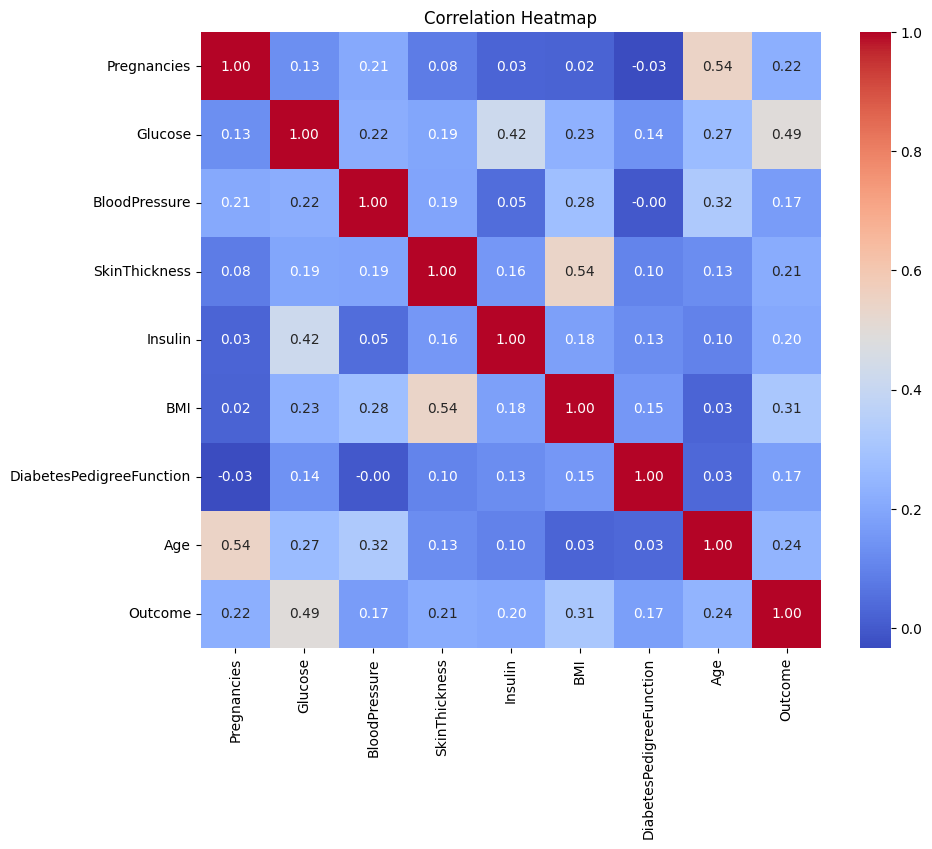

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Compare Features Against Outcome

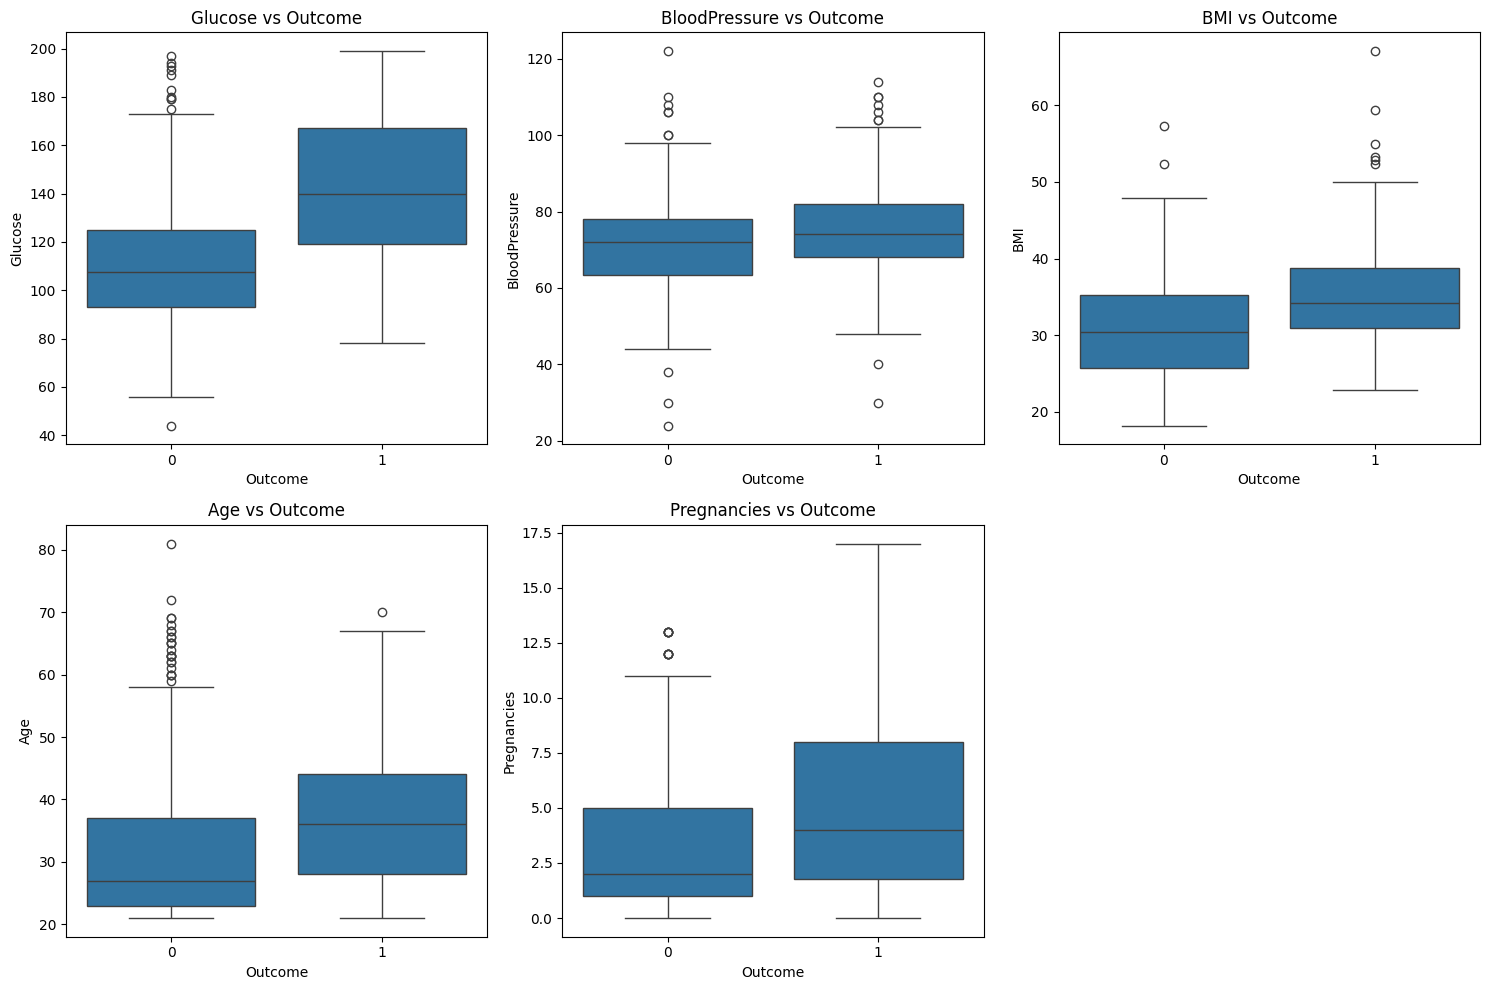

In [13]:
# Boxplots to show feature distribution by Outcome
features = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Pregnancies']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} vs Outcome')
plt.tight_layout()
plt.show()

Detect Outliers

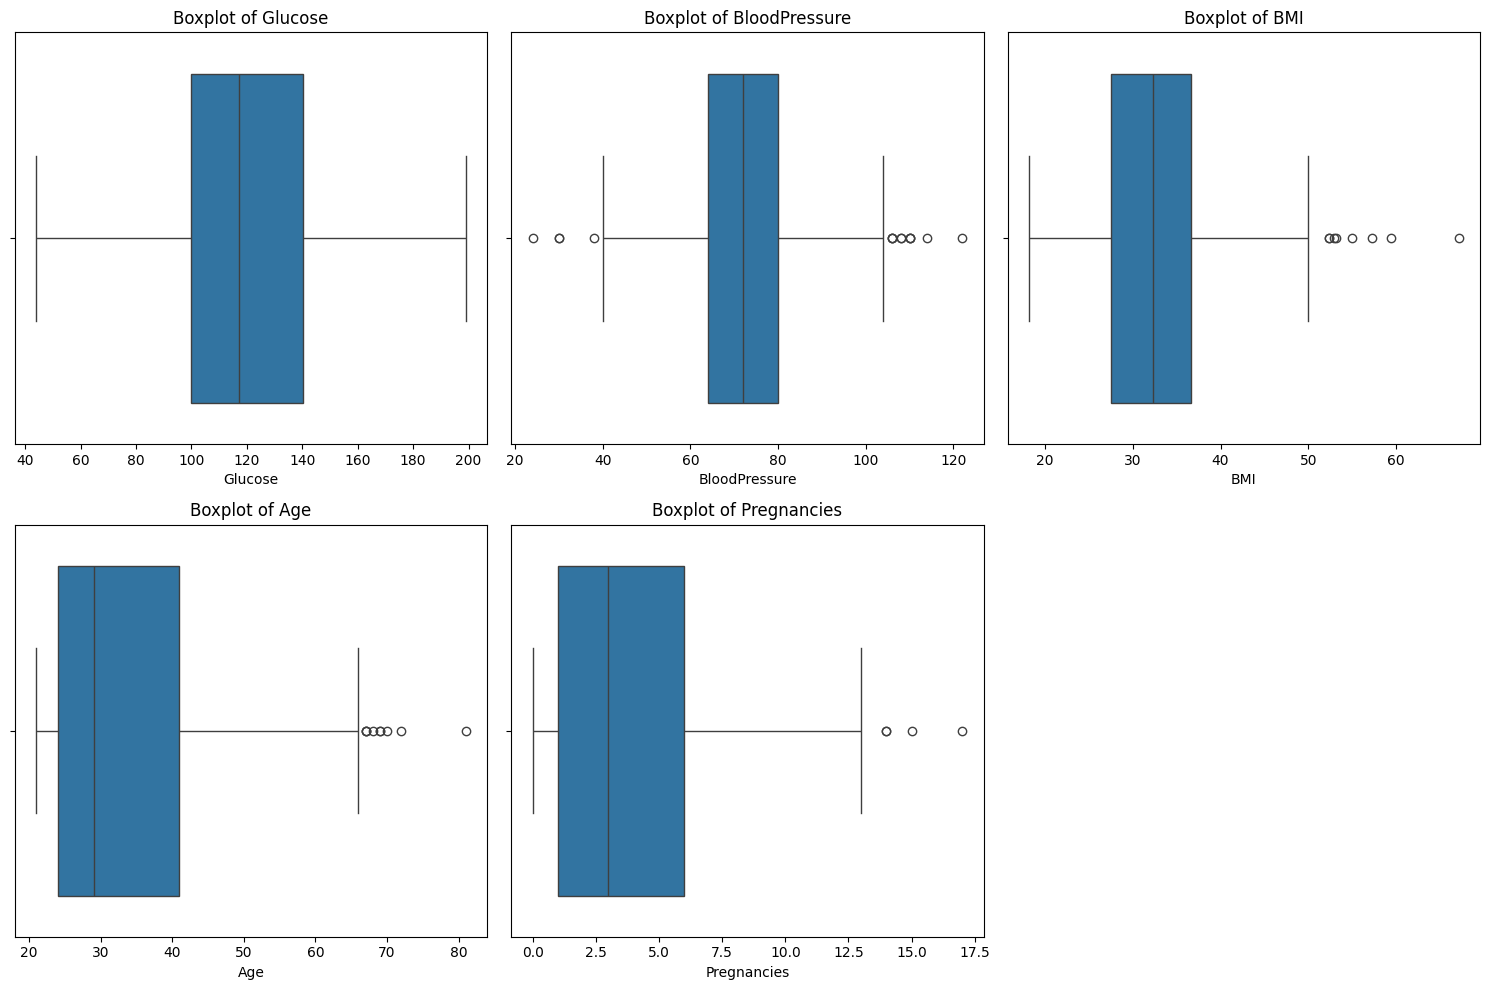

In [14]:
# Boxplots for detecting outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [15]:
# Remove outliers
def remove_outliers(df, columns):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        cutoff = 3 * std
        lower, upper = mean - cutoff, mean + cutoff
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Apply to selected columns
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']
df_cleaned = remove_outliers(df, columns_to_check)

print("Dataset shape after outlier removal:", df_cleaned.shape)


Dataset shape after outlier removal: (747, 9)


In [16]:
from sklearn.preprocessing import StandardScaler

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = StandardScaler()
df_cleaned[features] = scaler.fit_transform(df_cleaned[features])

print(df_cleaned.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.676601  0.880997      -0.015944       0.692881 -0.186741  0.209104   
1    -0.853123 -1.195460      -0.545277       0.002311 -0.186741 -0.869735   
2     1.288490  2.034585      -0.721721       0.002311 -0.186741 -1.378331   
3    -0.853123 -1.063621      -0.545277      -0.688259 -0.543036 -0.638555   
4    -1.159068  0.518441      -2.839052       0.692881  0.307475  1.673242   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.483634  1.496973        1  
1                 -0.364219 -0.172827        0  
2                  0.621871 -0.084943        1  
3                 -0.929455 -1.051669        0  
4                  5.586116  0.002941        1  


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into training and testing sets
X = df_cleaned[features]
y = df_cleaned['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8066666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       109
           1       0.64      0.66      0.65        41

    accuracy                           0.81       150
   macro avg       0.76      0.76      0.76       150
weighted avg       0.81      0.81      0.81       150

Confusion Matrix:
 [[94 15]
 [14 27]]


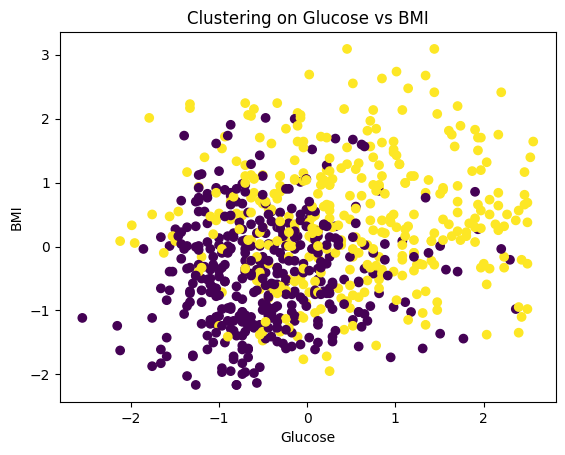

In [18]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.scatter(X['Glucose'], X['BMI'], c=df_cleaned['Cluster'], cmap='viridis')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Clustering on Glucose vs BMI')
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Model Accuracy: 0.8133333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       109
           1       0.64      0.71      0.67        41

    accuracy                           0.81       150
   macro avg       0.77      0.78      0.77       150
weighted avg       0.82      0.81      0.82       150



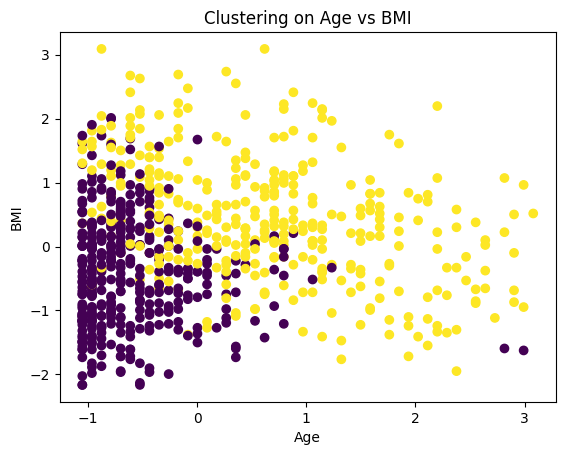

In [20]:
# Visualize clusters with different features
plt.scatter(X['Age'], X['BMI'], c=df_cleaned['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Clustering on Age vs BMI')
plt.show()


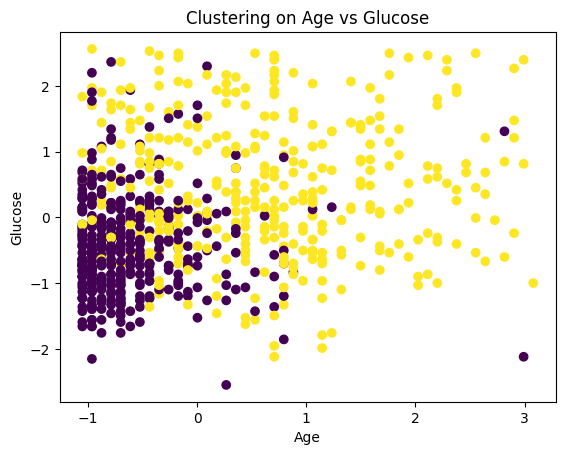

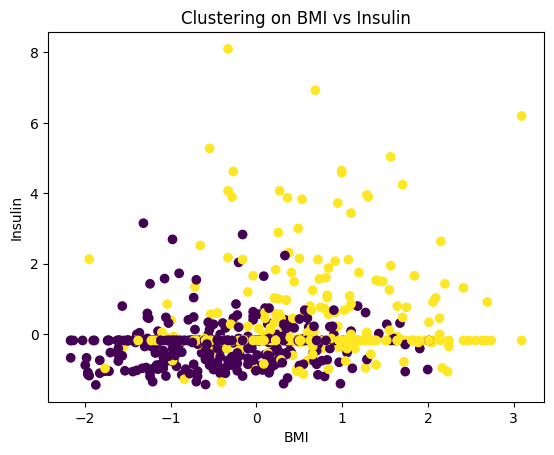

In [21]:
# Age vs Glucose
plt.scatter(X['Age'], X['Glucose'], c=df_cleaned['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Clustering on Age vs Glucose')
plt.show()

# BMI vs Insulin
plt.scatter(X['BMI'], X['Insulin'], c=df_cleaned['Cluster'], cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Insulin')
plt.title('Clustering on BMI vs Insulin')
plt.show()


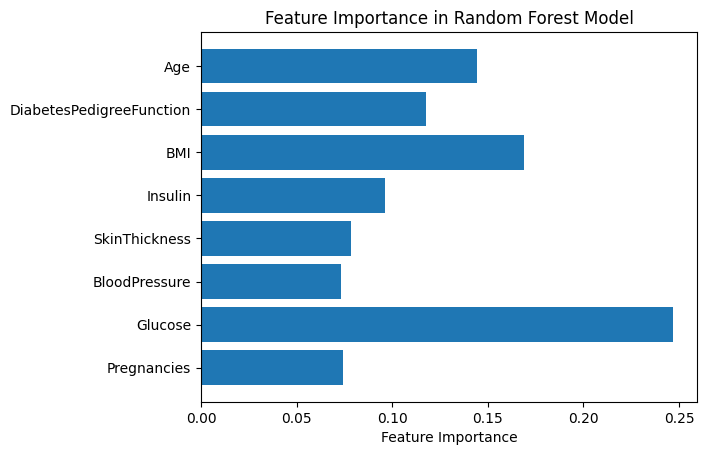

In [22]:
# Feature importance visualization
importances = best_model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [24]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8266666666666667
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       109
           1       0.73      0.59      0.65        41

    accuracy                           0.83       150
   macro avg       0.79      0.75      0.77       150
weighted avg       0.82      0.83      0.82       150



In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8066666666666666
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       109
           1       0.63      0.71      0.67        41

    accuracy                           0.81       150
   macro avg       0.76      0.78      0.77       150
weighted avg       0.82      0.81      0.81       150



In [26]:
from sklearn.svm import SVC

# Train SVM Classifier
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate SVM
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8133333333333334
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       109
           1       0.69      0.59      0.63        41

    accuracy                           0.81       150
   macro avg       0.77      0.74      0.75       150
weighted avg       0.81      0.81      0.81       150



In [27]:
# summary table metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# calculate metrics function
def calculate_metrics(y_test, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
    }

# Gather results
results = []
results.append(calculate_metrics(y_test, y_pred_log, "Logistic Regression"))
results.append(calculate_metrics(y_test, y_pred_gb, "Gradient Boosting"))
results.append(calculate_metrics(y_test, y_pred_svm, "SVM"))

# Convert to DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.826667   0.727273  0.585366  0.648649
1    Gradient Boosting  0.806667   0.630435  0.707317  0.666667
2                  SVM  0.813333   0.685714  0.585366  0.631579


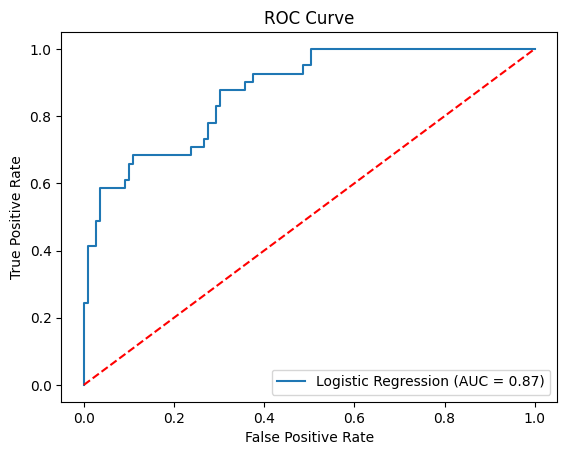

In [28]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curve for Logistic Regression
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
